# Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.

В дальнейшем вы сможете импортировать ваши функции в любой проект, например, так:

`import sys` <br>
`sys.path.append('/*SOME_PATH*/my_code/my_utils')` <br>
`from utils.plot import plot_denisty` <br>

<br>    
Скорее всего, со временем вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая не раз выручит вас.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

В данной домашке вам предлагается реализовать две функции на датасете титаник, немного измененном следующим образом:

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('titanic/train.csv')
df.Embarked.replace('Q', '', inplace=True)
df.PassengerId = df.PassengerId.astype('string')

## tool: информация о колонках датафрейма (4 балла)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`, это стабильнее, чем `df.col.dtype`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        - если таких несколько - можно брать любой
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001 (напр. '' или -1)
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде (по колонкам можно)

In [2]:
def get_df_info(df, thr=1.0):
    """
    Выводит инфу о колонках датафрейма в виде датафрейма

    df: исходный датафрейм\\
    thr: порог для trash_score (по умолчанию 1, т.к. колонка с единственным значением мусорная)

    returns: pd.DataFrame с инфой
    """
    # your code here

    
    def df_freq_to_float(s):
        """
        Преобразует форматированную строку с частотой в число

        s: str формата "char: float" или "-1"

        returns: float
        """
        if s == "-1":
            return 0.0
        return float(s.split()[-1])


    df_info = pd.DataFrame(
        index=df.columns,
        columns=[
            "data_type",
            "count_unique",
            "example_1",
            "example_2",
            "zero",
            "nan",
            "empty_str",
            "vc_max",
            "vc_max_freq",
            "trash_score",
        ],
    )

    df = df.copy()
    df.replace("", "<empty_str>", inplace=True)

    for col in df.columns:
        df_info.loc[col, "data_type"] = df[col].dtype.name
        df_info.loc[col, "count_unique"] = df[col].nunique(dropna=False)

        # выбор различных случайных примеров
        no_nan_col = df[col].dropna()
        df_info.loc[col, "example_1"], df_info.loc[col, "example_2"] = (
            "<no_example>",
            "<no_example>",
        )
        if (size := no_nan_col.nunique()) == 1:
            df_info.loc[col, "example_1"] = no_nan_col.iloc[0]
        elif size >= 2:
            (
                df_info.loc[col, "example_1"],
                df_info.loc[col, "example_2"],
            ) = np.random.choice(pd.unique(no_nan_col), size=2, replace=False)

        # подсчет нулей
        try:
            tmp = np.isclose(df[col], 0).mean()
            zero_frac = "z: {:.3f}".format(tmp) if ~np.isclose(tmp, 0) else "-1"
        except:
            zero_frac = "-1"
        df_info.loc[col, "zero"] = zero_frac

        # подсчет нанов
        df_info.loc[col, "nan"] = (
            "n: {:.3f}".format(tmp)
            if ~np.isclose(tmp := df[col].isna().mean(), 0)
            else "-1"
        )

        # подсчет пустых строк
        df_info.loc[col, "empty_str"] = (
            "e: {:.3f}".format(tmp)
            if ~np.isclose(tmp := (df[col] == "<empty_str>").mean(), 0)
            else "-1"
        )

        # подсчет самого частовстречающегося элемента
        if size:
            vc_max = no_nan_col.value_counts(normalize=True).sort_values(
                ascending=False
            )
            df_info.loc[col, "vc_max"] = vc_max.index[0]
            df_info.loc[col, "vc_max_freq"] = "{:.3f}".format(vc_max.iloc[0])
        else:
            df_info.loc[col, "vc_max"] = "No vc_max"
            df_info.loc[col, "vc_max_freq"] = "0"

        # вычисление <<мусорности>> колонки
        zero, nan, empty_str, vc_max_freq = (
            df_freq_to_float(df_info.loc[col, "zero"]),
            df_freq_to_float(df_info.loc[col, "nan"]),
            df_freq_to_float(df_info.loc[col, "empty_str"]),
            df_freq_to_float(df_info.loc[col, "vc_max_freq"]),
        )
        trash_score = max(
            zero + nan + empty_str, vc_max_freq if vc_max_freq > thr else 0
        )
        df_info.loc[col, "trash_score"] = (
            "{:.3f}".format(trash_score) if ~np.isclose(trash_score, 0) else "-1"
        )

    return df_info.sort_values(by="trash_score", ascending=False)


In [3]:
# пример 1
get_df_info(df)

,data_type,count_unique,example_1,example_2,zero,nan,empty_str,vc_max,vc_max_freq,trash_score
Cabin,object,148,D17,C111,-1,n: 0.771,-1,B96 B98,0.020,0.771
Parch,int64,7,3,1,z: 0.761,-1,-1,0,0.761,0.761
SibSp,int64,7,3,1,z: 0.682,-1,-1,0,0.682,0.682
Survived,int64,2,1,0,z: 0.616,-1,-1,0,0.616,0.616
Age,float64,89,20.0,50.0,-1,n: 0.199,-1,24.0,0.042,0.199
Embarked,object,4,C,S,-1,n: 0.002,e: 0.086,S,0.724,0.088
Fare,float64,248,15.2458,81.8583,z: 0.017,-1,-1,8.05,0.048,0.017
PassengerId,string,891,174,559,-1,-1,-1,1,0.001,-1
Pclass,int64,3,3,1,-1,-1,-1,3,0.551,-1
Name,object,891,"Somerton, Mr. Francis William","Dean, Mr. Bertram Frank",-1,-1,-1,"Braund, Mr. Owen Harris",0.001,-1


In [4]:
# пример 2
get_df_info(df, thr=0.2)

,data_type,count_unique,example_1,example_2,zero,nan,empty_str,vc_max,vc_max_freq,trash_score
Cabin,object,148,B102,E50,-1,n: 0.771,-1,B96 B98,0.020,0.771
Parch,int64,7,3,1,z: 0.761,-1,-1,0,0.761,0.761
Embarked,object,4,C,S,-1,n: 0.002,e: 0.086,S,0.724,0.724
SibSp,int64,7,2,4,z: 0.682,-1,-1,0,0.682,0.682
Sex,object,2,female,male,-1,-1,-1,male,0.648,0.648
Survived,int64,2,0,1,z: 0.616,-1,-1,0,0.616,0.616
Pclass,int64,3,1,3,-1,-1,-1,3,0.551,0.551
Age,float64,89,15.0,19.0,-1,n: 0.199,-1,24.0,0.042,0.199
Fare,float64,248,9.8417,14.4583,z: 0.017,-1,-1,8.05,0.048,0.017
PassengerId,string,891,522,561,-1,-1,-1,1,0.001,-1


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

get_df_info(df)

,dtype,nunique,example_1,example_2,zero,nan,empty_str,vc_max,trash_score
,,,,,,,,,
Cabin,object,147,C148,B42,-1,n: 0.771,-1,"(0.02, G6)",0.771
Parch,int64,7,6,4,z: 0.761,-1,-1,"(0.761, 0)",0.761
SibSp,int64,7,8,5,z: 0.682,-1,-1,"(0.682, 0)",0.682
Survived,int64,2,1,0,z: 0.616,-1,-1,"(0.616, 0)",0.616
Age,float64,88,74.0,34.5,-1,n: 0.199,-1,"(0.042, 24.0)",0.199
Embarked,object,3,'',C,-1,n: 0.002,e: 0.086,"(0.724, S)",0.089
Fare,float64,248,10.5167,9.8458,z: 0.017,-1,-1,"(0.048, 8.05)",0.017
Ticket,object,681,370376,111369,-1,-1,-1,"(0.008, 347082)",-1
Sex,object,2,female,male,-1,-1,-1,"(0.648, male)",-1


## tool: распределения признаков (6 баллов)

#### чтобы получить полный балл, нужно прикрепить ваш правильно работающий пример в отдельном окошке и ответить на вопрос в конце

**!** Обновите matplotlib, seaborn до последней версии

In [1]:
# !pip install --upgrade matplotlib seaborn

Нужно реализовать рисовалку распределения колонок датафрейма через функцию или через класс, как вам удобней.
    Отрисовываемые колонки принимаются на вход. Далее вы для каждой такой колонки создаете `fig, ax` и отрисовываете туда то,
    что описано ниже в задании. Также, на вход принимается hue-колонка (см. семинар), по которой бьется раскраска.

- для числовых колонок
    - sns.histplot
        - предобработка данных: принимайте на вход флажок `drop_zero`. Если он True, выкиньте все нули прежде чем рисовать
        - количество бинов остается за вами
        - используйте аргументы `multiple='stack'`, `element='step'` (самый быстрый), `stat='count'`,
            `alpha=0.8` (чтобы подогнать цвет гистограммы под остальные цвета, без этого будет слишком яркий график)
        
    - sns.boxenplot + sns.stripplot
        - предобработка данных: если `drop_zero`, рисуем оба графика без нулей
        - в boxenplot используйте `showfliers=False`, выбросы будут подсвечиваться stripplot'ом
        - в stripplot не нужно рисовать все точки, нужно засэмплировать немного (напр. 200)
        
    - special (0, np.nan)
        - это будет sns.barplot, показывающий распределение по спец. значениям - нулям и нанам
        - предобработка данных: посчитайте для каждого значения колонки `hue` (см. groupby) долю нанов и нулей
            (независимо от `drop_zero`), оберните в датафрейм и отрисуйте с помощью sns.barplot
        - вместо чистого нуля используйте что-то отрицательное (напр. -0.1 * [значение самого высокого бина])
        - используйте у barplot аргумент `edgecolor='black'`
        - добавьте `ax.axhline(0, color='black', ls='--')` на этот же ax, чтобы четко выделить 0
        - добавьте горизонтальную решетку `ax.grid(True, axis='y')`
        
    
- для категориальных колонок
    - категориальными считаем все (числовые / нечисловые) колонки c количеством уникальных
        значений меньше `max_cat_thr`: принимаем на вход (напр. 20)
        
    - sns.countplot + обработка пустых строк, нанов
        - предобработка данных: замените все наны и пустые строки на понятные вам спецстроки для наглядности (см. пример)
        - используйте `stat='count'`, `edgecolor='black'`
        - добавьте горизонтальную решетку
        - поверните выводимые значения на оси X на 90 градусов `ax.tick_params('x', rotation=90)`
        
        
- общее:
    - убедитесь, что не рисуете колонку, которую передаете в hue, а также колонки, которые не попали ни в числовые,
        ни в категориальные
    
    - настройте `ax.set_title`, `fig.suptitle` - пусть они помогают вам и нам быстро разобраться, что на графике.
        Не нужно подписывать, что на графике histplot или что-то подобное, лучше подпишите какое-нибудь уточнение к графику,
        например, что ящики построены без учета выбросов. Однако, не нужно плодить лишнего.
    
    - уберите все ненужные `ax.set_xlabel`, `ax.set_ylabel`
    
    - пусть на каждую колонку у вас будет по одной легенде на любом из графиков
    
    - настройте у графиков аргумент `hue_order`, чтобы заранее зафиксировать порядок раскраски.
        Например, если ваша hue-колонка Survived, то `hue_order=[0, 1]` зафиксирует, что у вас все что относится к значению 0
        всегда покрасится в первый цвет, а к 1 - во второй. Если вы не будете так делать, вам не всегда гарантируется ожидаемая
        покраска.
    
    - настройте достаточно крупный размер шрифта у всего, у чего можно - аргумент `fontsize`,
        но `ax.tick_params(..., labelsize=)` (напр. 15). Заметка: если создавать легенду через ax.legend(...), задать ей размер
        шрифта можно с помощью аргумента `fontsize`. Но если делать автолегенду в сиборновских функциях (аргумент legend), то
        поменять ей размер шрифта уже очень сложно. Выход - заранее задать в матплотлибе размер шрифта легенды по умолчанию на
        достаточно крупный (код ниже).

    - НЕ объединяйте пустые строки, наны, и т.п. в один "мусорный" бин. Зачастую спецзначения - самая ценная информация по колонке,
        которую никак нельзя терять таким объединением.
        
        
- про адекватность: ниже дан пример того, что у вас может получиться. Там не везде настроен размер шрифтов и не везде интуитивно
    вам понятные titles, но в остальном - пойдет. Главное - чтобы все было хорошо видно и не было лишнего.
    
    
- на будущее: пытаясь применить эту рисовалку на других датасетах, вы столкнетесь с множеством проблем, поскольку задание
    сформулировано только для титаника, и чтобы не переусложнять, не включает в себя разные нюансы.
    Пусть вас это не пугает - переписывайте, добавляйте, исправляйте, все получится! Иметь корректно работающую на любом
    датасете рисовалку очень полезно :)
    

In [ ]:
# Если у вас ошибка вида 'float64 has no attribute startswith', лучше переключитесь на matplotlib 3.6.0

# Сделать это можно, например, так, после чего перезапустить ядро ноутбука
# !pip install --upgrade matplotlib==3.6.0

In [5]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# настройка размера шрифта легенды
mpl.rcParams['legend.title_fontsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

In [6]:
def plot_density(df, hue, cols=None, drop_zero=False, max_cat_thr=20, bins=None):
    """
    Рисует распределения колонок cols

    df: отрисовываемый датафрейм\\
    hue: колонка, по которой бьётся раскраска\\
    cols: отрисовываемые колонки. Если None, то рисуем df.columns (кроме hue)\\
    drop_zero: если True, то выкидываем нули из числовых колонок\\
    max_cat_thr: порог количества значений категориальных признаков\\
    bins: количество бинов для построения гистограмм; если None, то bins='auto'
    """
    # your code here
    if cols is None:
        cols = df.columns

    # определяем, какие признаки числовые, а какие категориальные
    cat_feat, num_feat = [], []
    for col in cols:
        if col != hue:
            if df[col].nunique() <= max_cat_thr:
                cat_feat.append(col)
            elif pd.api.types.is_numeric_dtype(df[col]):
                num_feat.append(col)

    df_copy = df.copy()
    df_copy.fillna(value={hue: "<NaN>"}, inplace=True)
    df_copy.replace(to_replace="", value={hue: "<empty_str>"}, inplace=True)

    # отрисовка числовых признаков
    for col in num_feat:
        fig, ax = plt.subplots(1, 3)
        fig.suptitle(col + " vs. " + hue, fontsize=15)
        temp_df = df_copy.dropna()

        # drop zeros
        if drop_zero:
            temp_df = df_copy[~np.isclose(df_copy[col], 0)]
        hue_order = sorted(pd.unique(temp_df[hue]))

        # hist
        if bins is None:
            bins = "auto"

        sns.histplot(
            data=temp_df,
            x=col,
            hue=hue,
            hue_order=hue_order,
            bins=bins,
            multiple="stack",
            element="step",
            stat="count",
            alpha=0.8,
            ax=ax[0],
            legend=False,
        )
        ax[0].set_xlabel(None)
        ax[0].set_ylabel(None)
        ax[0].set_title("drop_zero=" + str(drop_zero), fontsize=10)

        # special values (0, nan)
        # конструируем датафрейм
        s_df = df_copy[[col, hue]].copy()

        nans = s_df.groupby([hue], as_index=False)[col].apply(lambda x: x.isna().mean())
        nans.rename(columns={col: "value"}, inplace=True)
        nans = pd.DataFrame(nans)
        nans["cat"] = "<NaN>"

        s_df[col] = np.isclose(s_df[col], 0)
        zeros = s_df[[col, hue]].groupby([hue], as_index=False).mean()
        zeros.rename(columns={col: "value"}, inplace=True)
        zeros["cat"] = "0"

        s_df = pd.concat((nans, zeros), axis=0)
        s_df.loc[np.isclose(s_df["value"], 0), "value"] = -0.1 * s_df["value"].max()

        # отображаем датафрейм через barplot
        sns.barplot(
            data=s_df,
            x="cat",
            y="value",
            order=["0", "<NaN>"],
            hue=hue,
            hue_order=hue_order,
            legend=True,
            edgecolor="black",
            ax=ax[1],
        )
        ax[1].grid(True, axis="y")
        ax[1].axhline(0, color="black", ls="--")
        ax[1].tick_params("x", rotation=90, labelsize=10)
        ax[1].set_xlabel(None)
        ax[1].set_ylabel(None)
        ax[1].set_title("special values", fontsize=10)

        # boxen & strip
        sns.boxenplot(
            data=temp_df,
            y=col,
            hue=hue,
            hue_order=hue_order,
            showfliers=False,
            ax=ax[2],
            legend=False,
        )
        sns.stripplot(
            data=temp_df.sample(n=min(temp_df.shape[0], 200)),
            y=col,
            hue=hue,
            hue_order=hue_order,
            ax=ax[2],
            palette="dark:black",
            dodge=True,
            legend=False,
        )
        ax[2].set_xlabel(None)
        ax[2].set_ylabel(None)
        ax[2].set_title("no outliers + sampled stripplot", fontsize=10)

        fig.set_size_inches(12 + 2 * len(hue_order), 4)
        plt.show()

    # отрисовка категориальных признаков
    for col in cat_feat:
        fig, ax = plt.subplots()
        fig.suptitle(col + " vs. " + hue, fontsize=15)

        df_copy.replace("", "<empty_str>", inplace=True)
        df_copy.fillna("<NaN>", inplace=True)

        # countplot
        sns.countplot(
            data=df_copy,
            x=col,
            hue=hue,
            hue_order=hue_order,
            stat="count",
            edgecolor="black",
            ax=ax,
        )
        ax.set_xlabel(None)
        ax.tick_params(axis="x", rotation=90, labelsize=10)
        ax.grid(True, axis="y")

        fig.set_size_inches(8 + 2 * len(hue_order), 4)
        plt.show()

    return


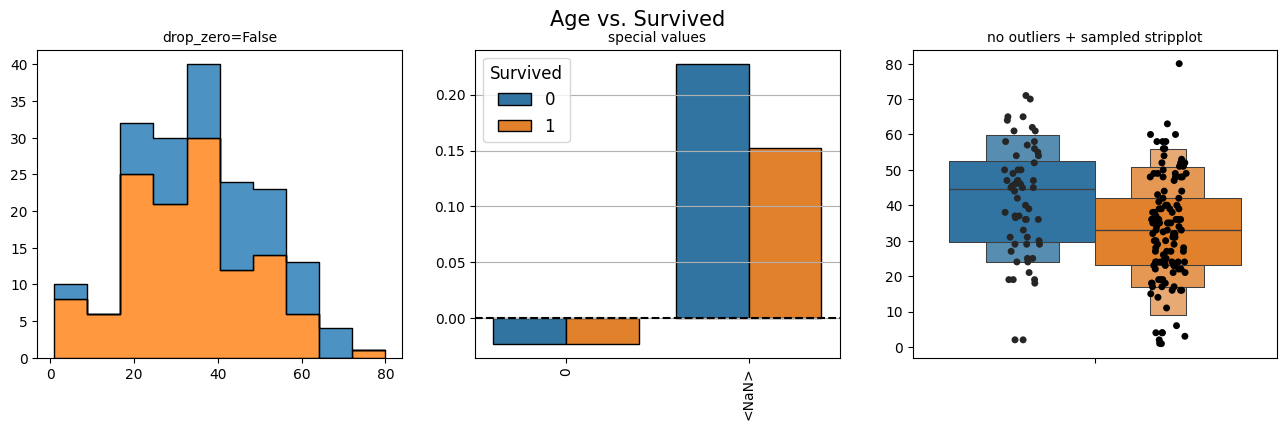

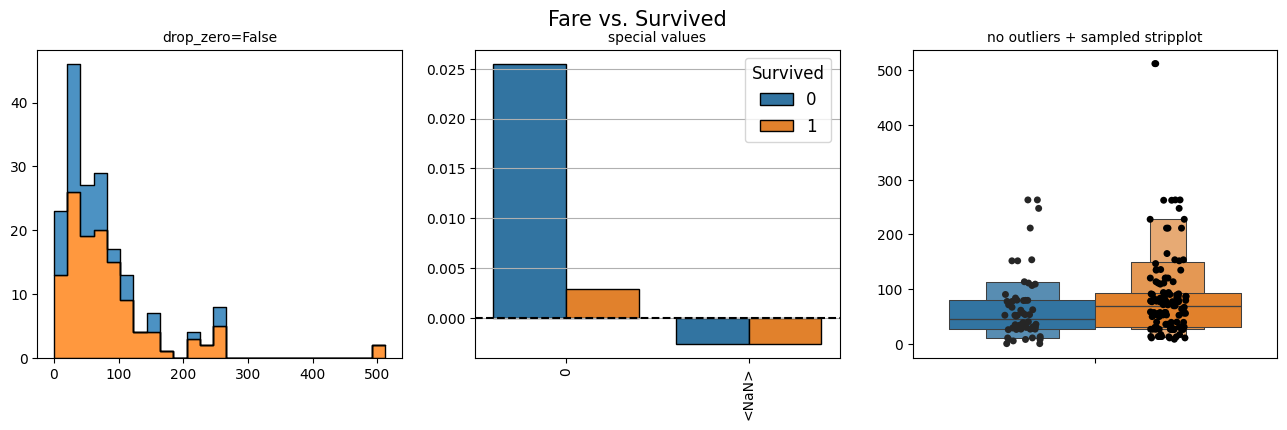

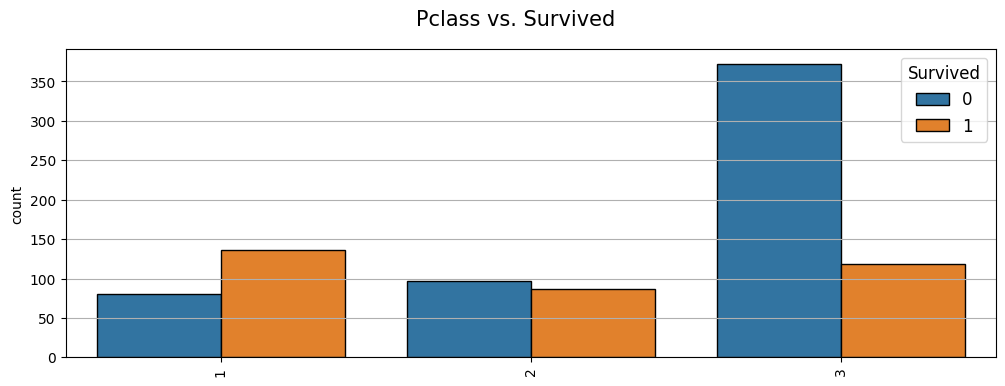

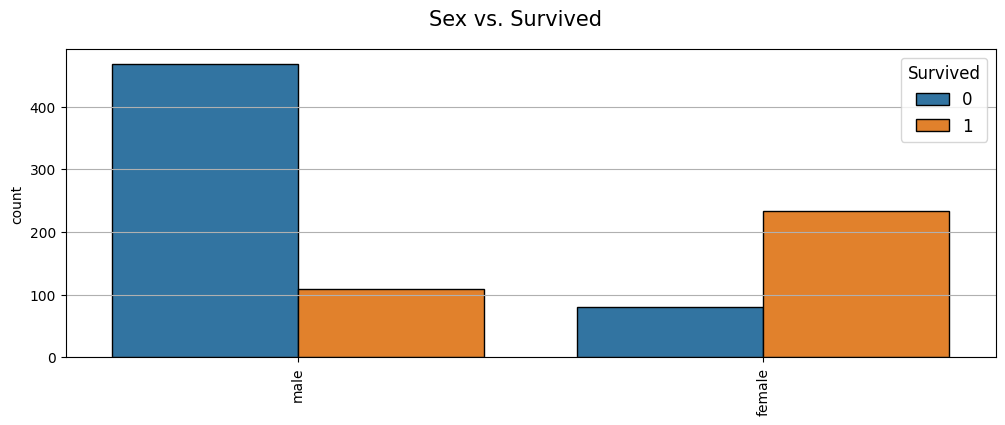

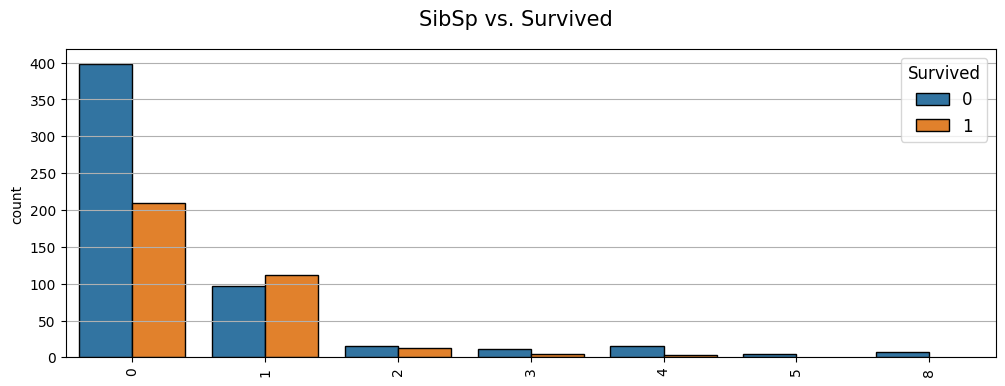

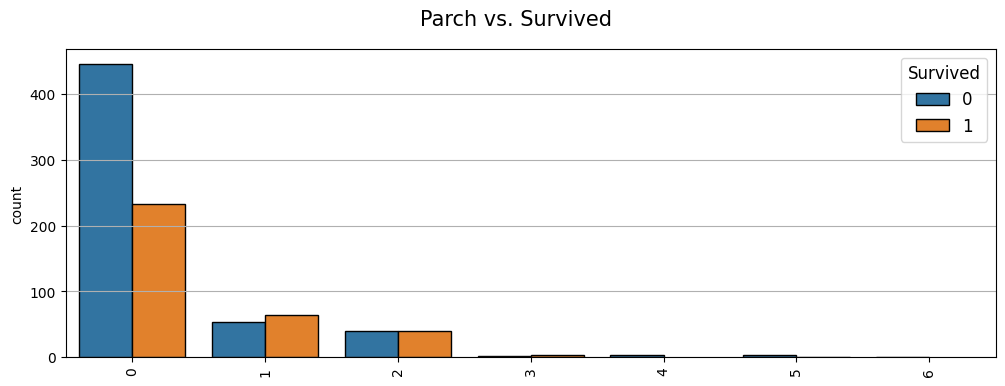

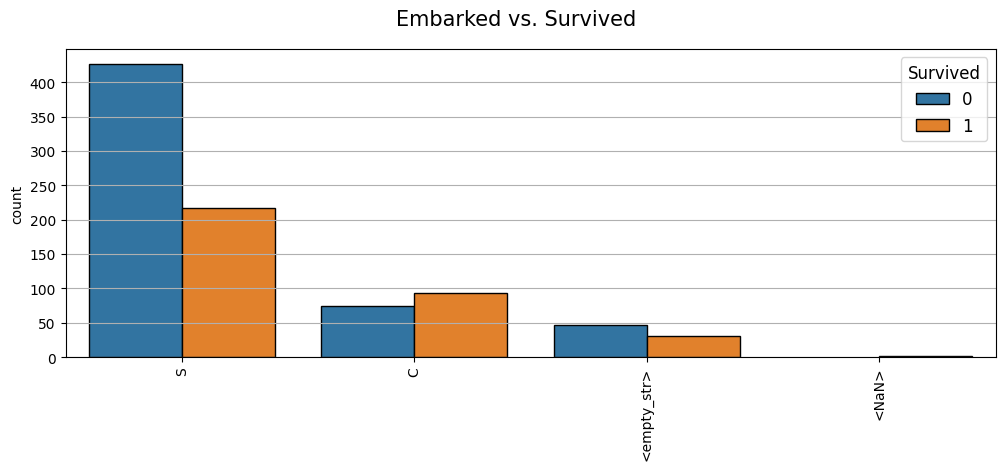

In [7]:
# пример 1
plot_density(df, hue='Survived')

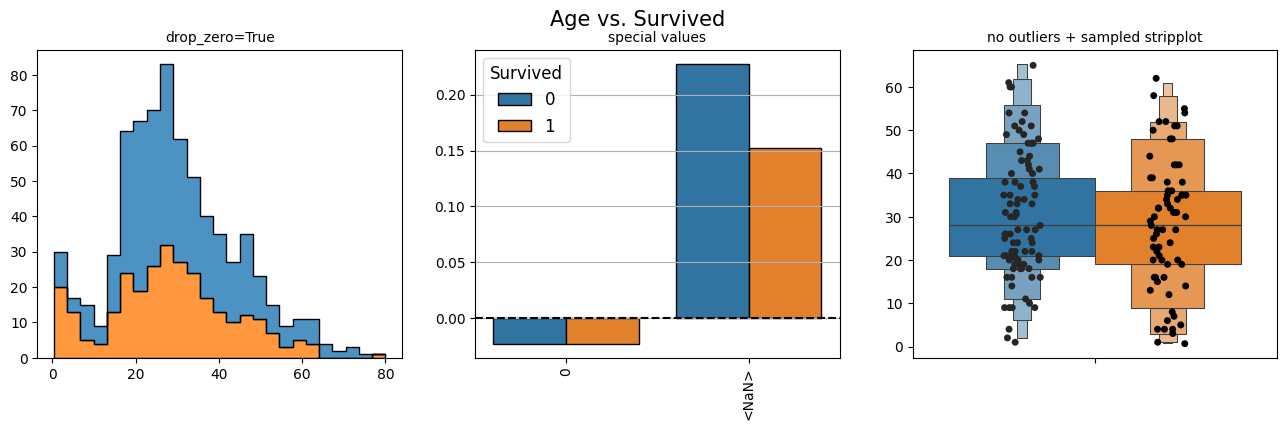

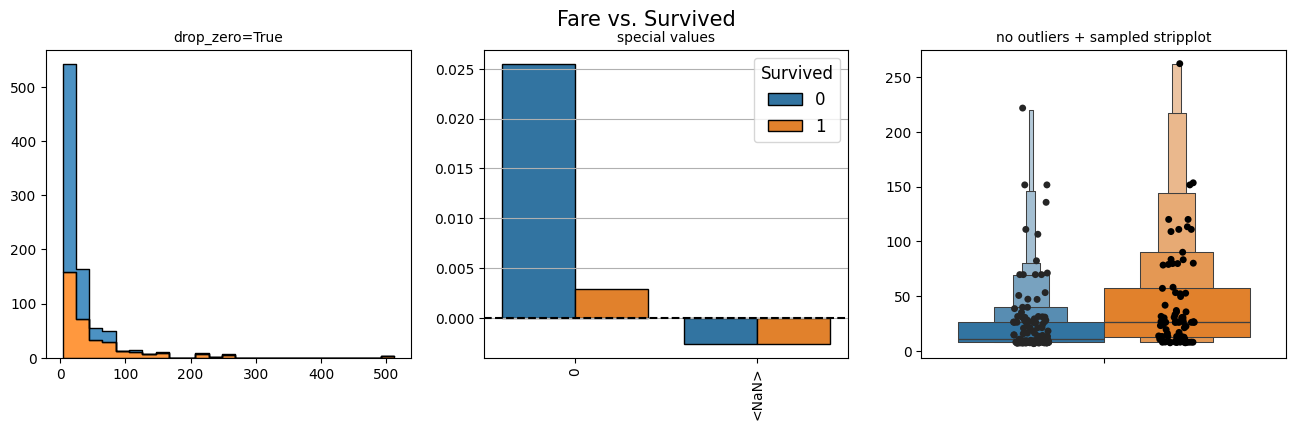

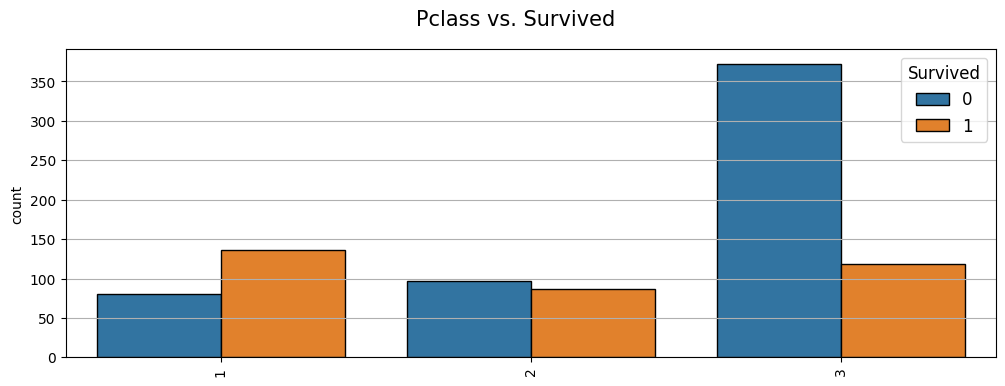

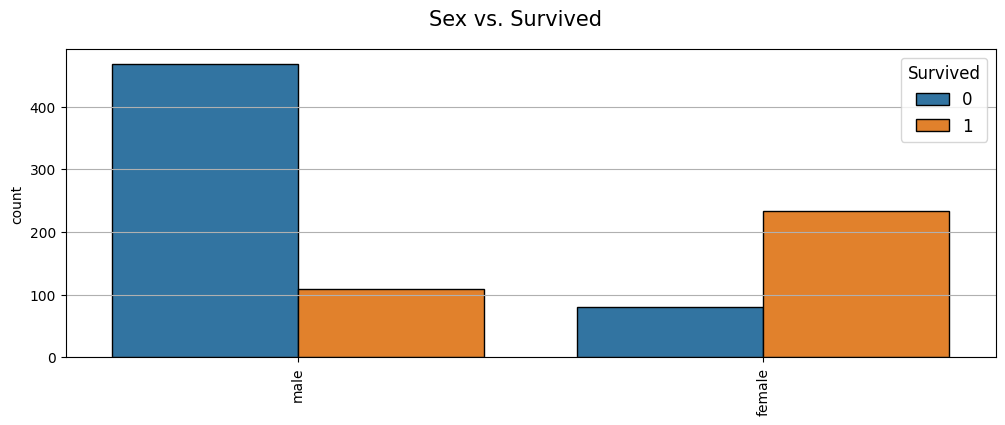

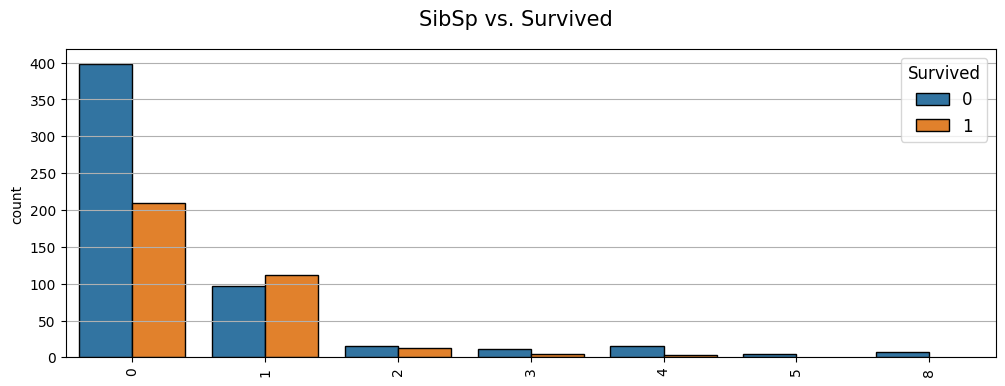

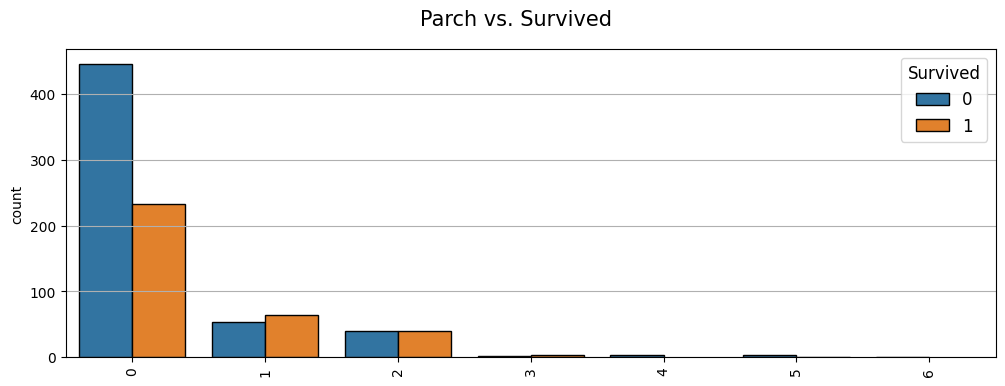

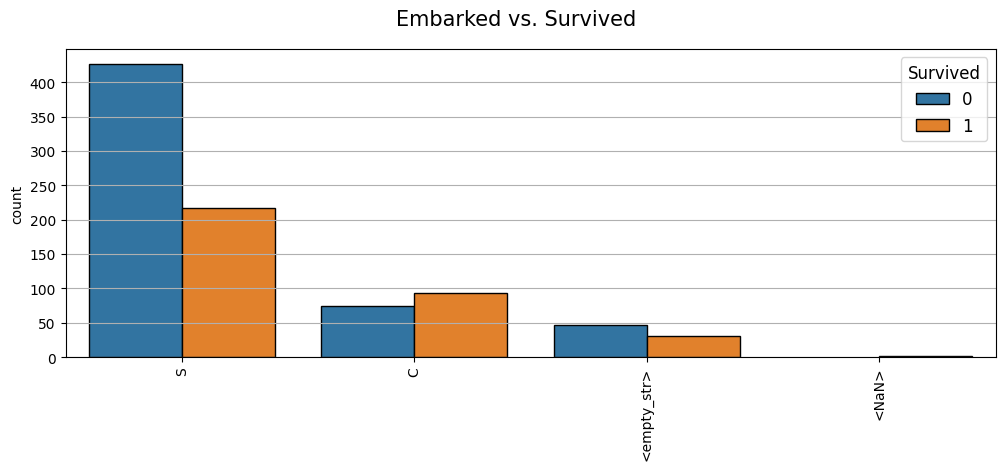

In [8]:
# пример 2
plot_density(df, drop_zero=True, hue='Survived', bins=25)

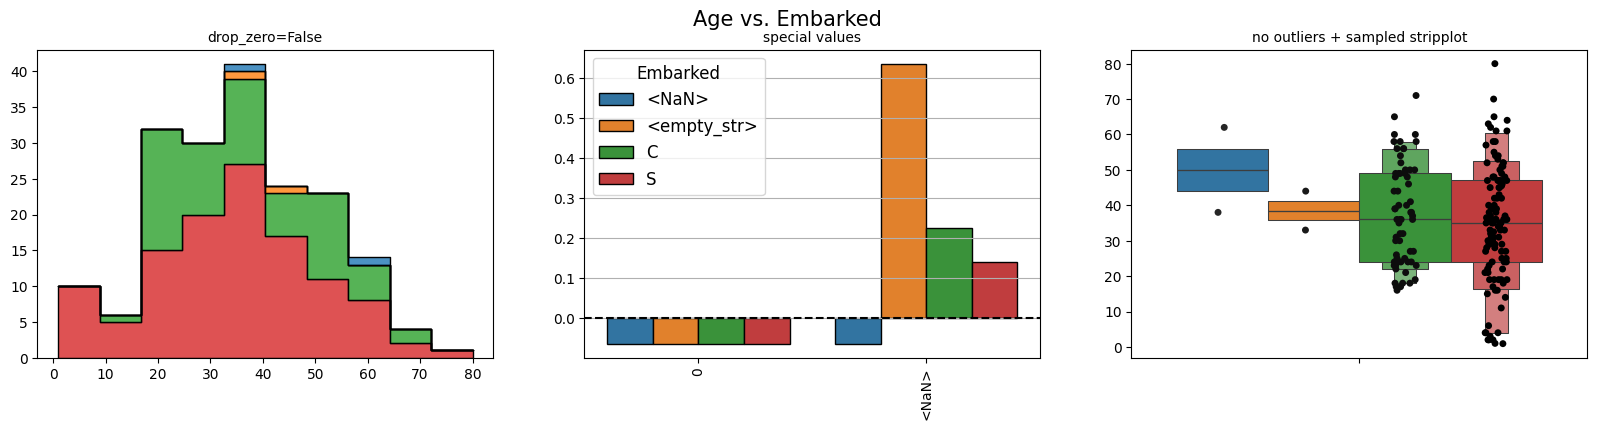

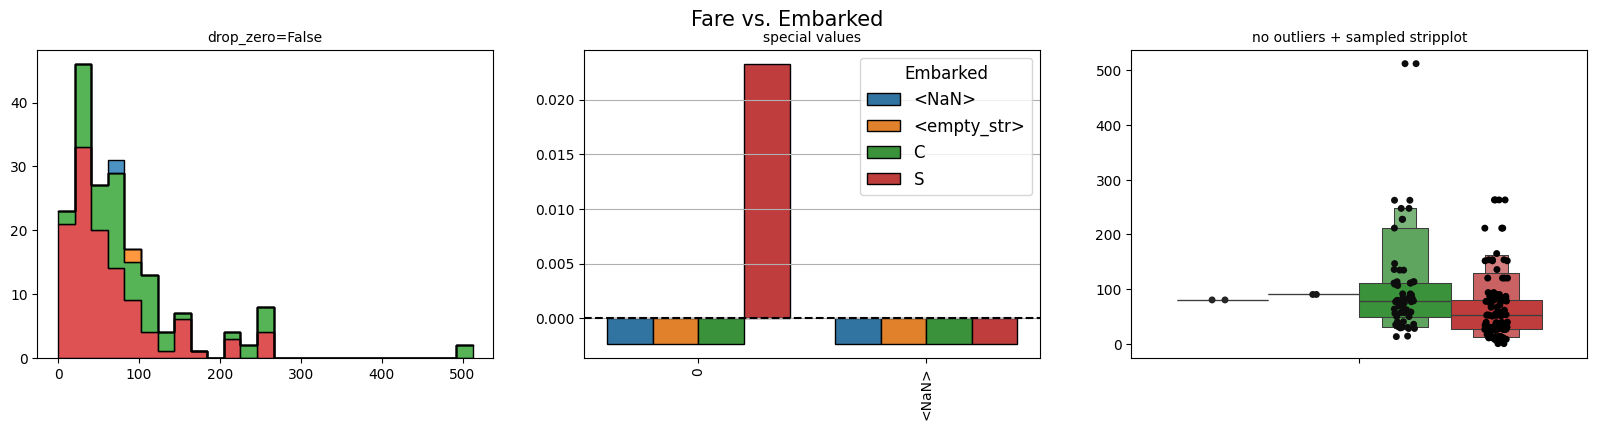

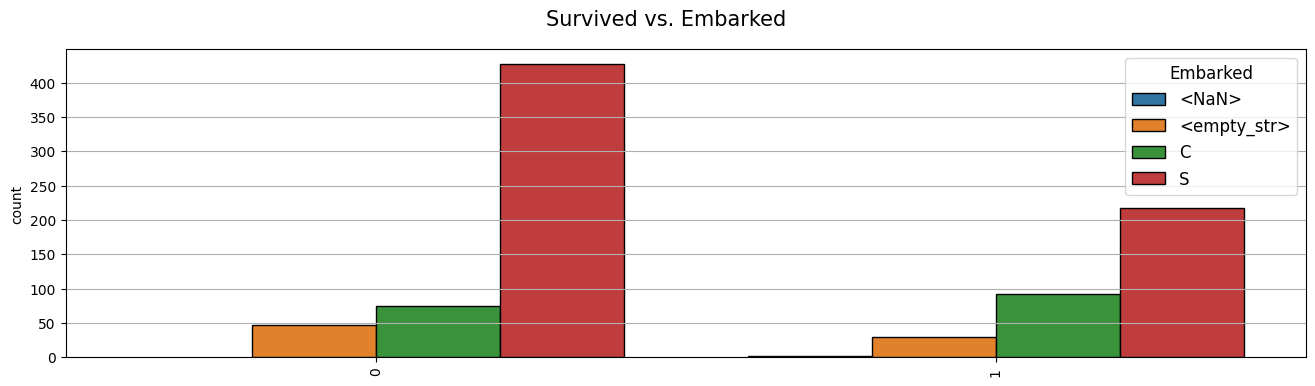

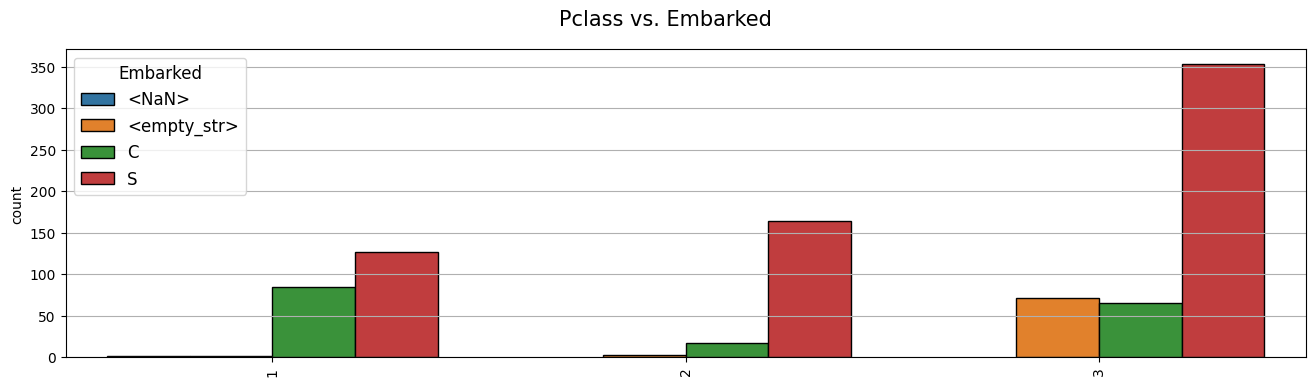

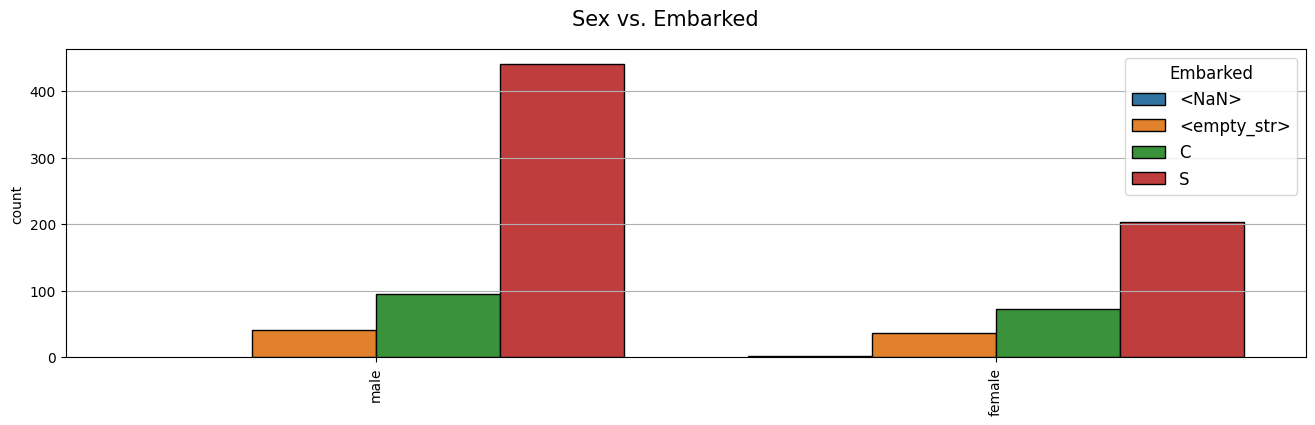

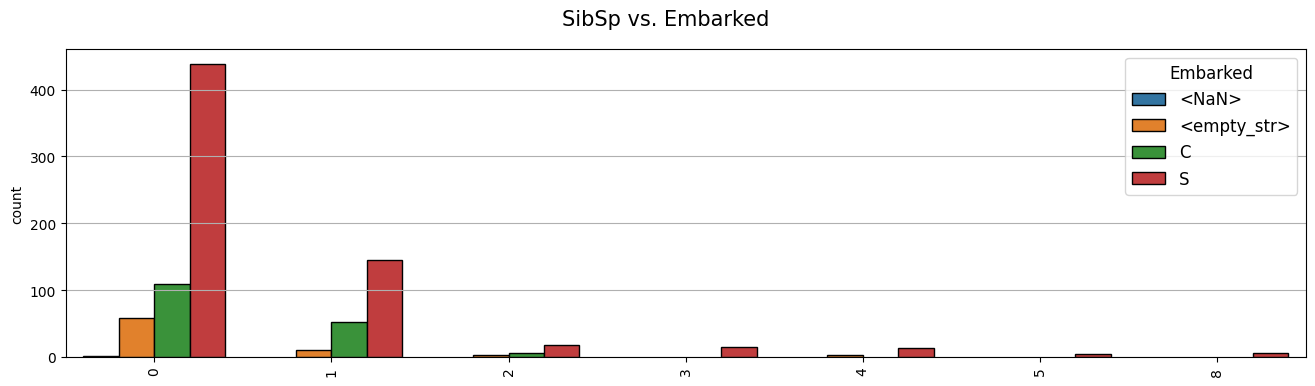

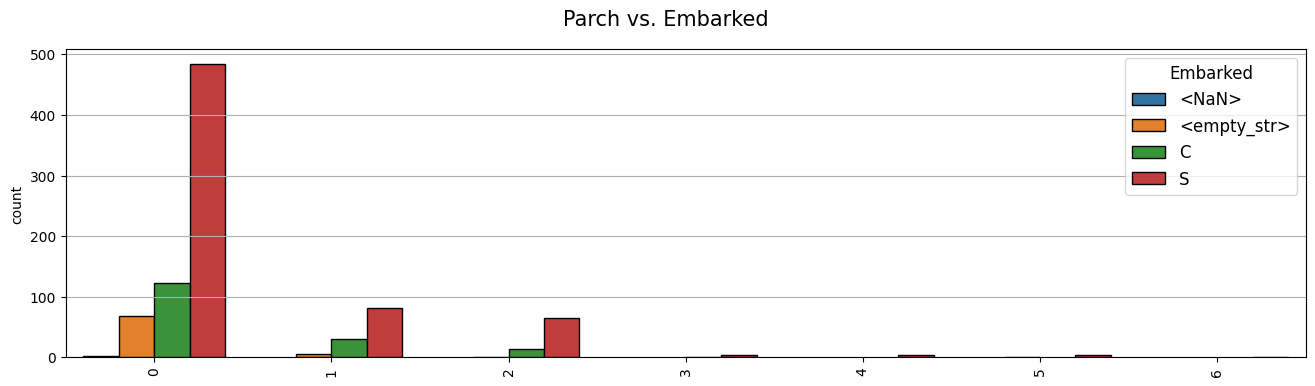

In [9]:
# пример 3
plot_density(df, hue='Embarked')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
################################################################################


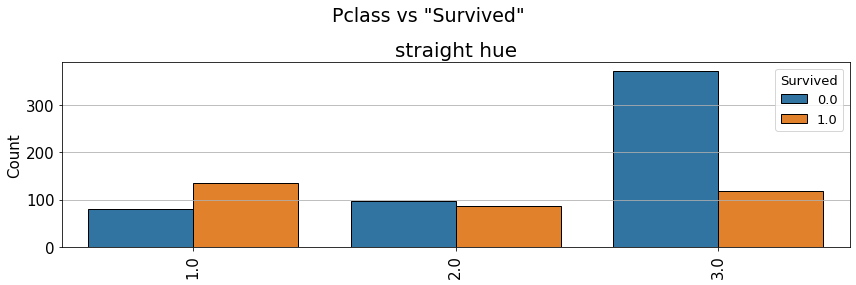

################################################################################


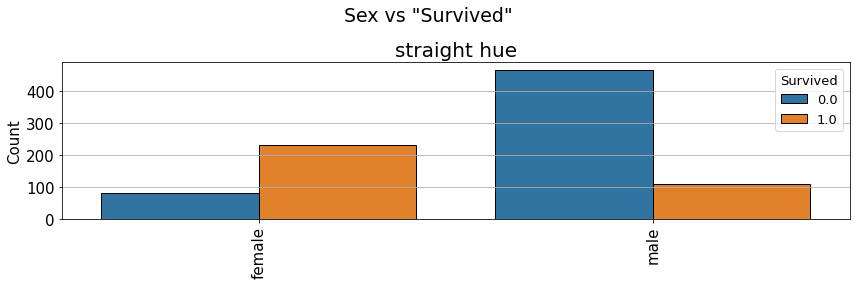

################################################################################


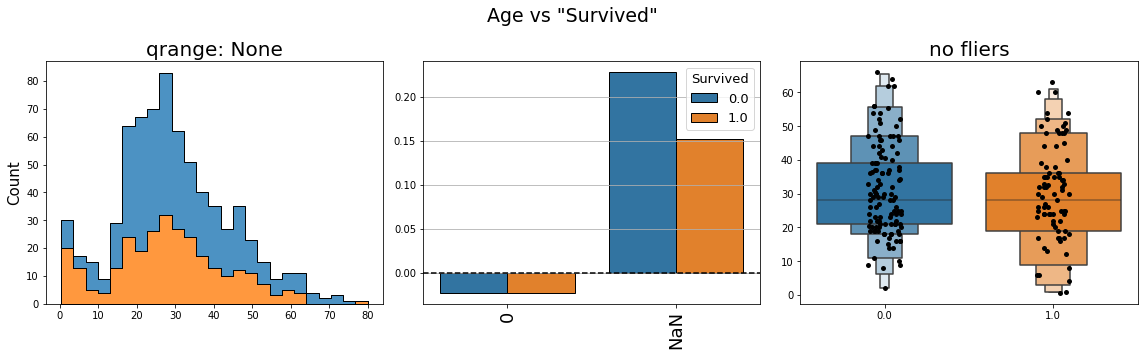

################################################################################


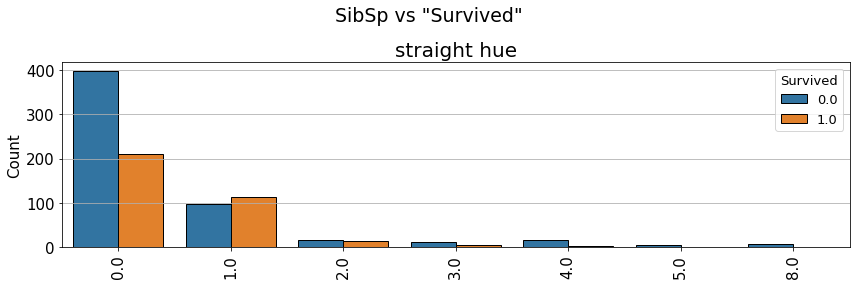

################################################################################


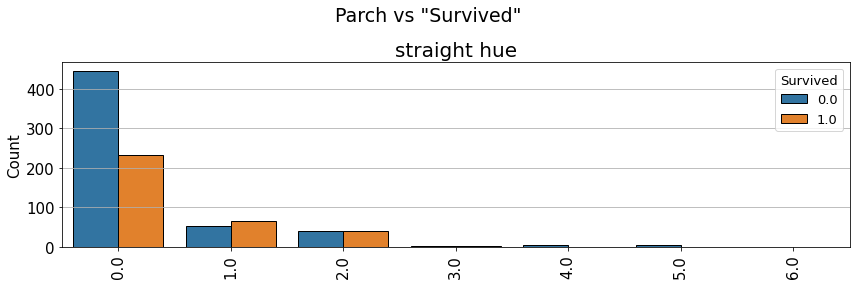

################################################################################


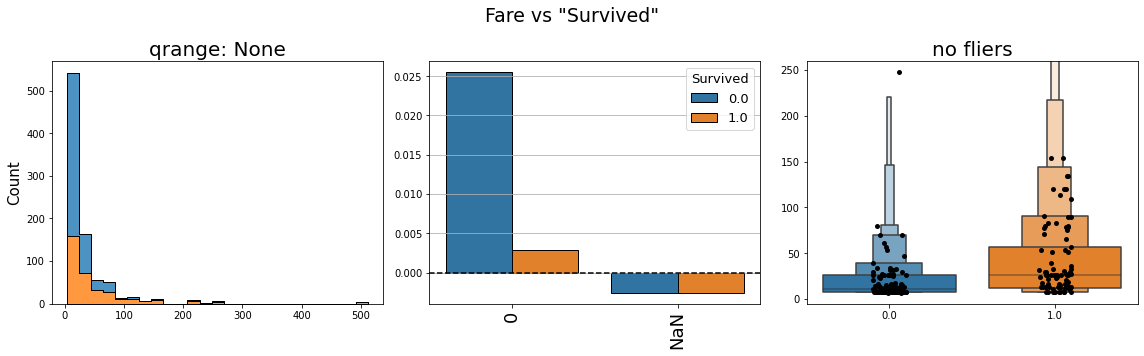

################################################################################


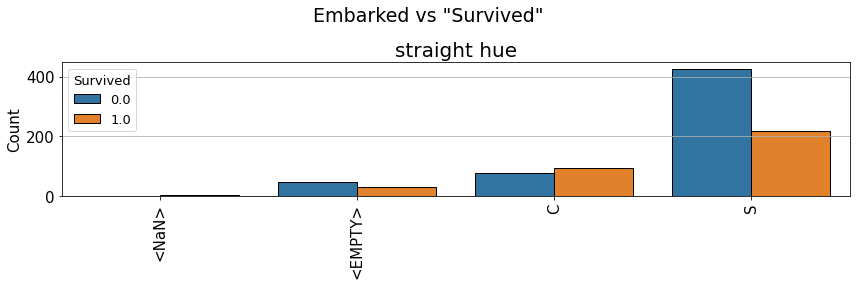

################################################################################


In [ ]:
# Это пример, не запускайте эту ячейку

# WARNING: пример не обязан соблюдать все пункты задания, но вы обязаны :)

plot_density(df, hue='Survived')

***Вопрос:*** Как вы думаете, какие проблемы с этой рисовалкой могут возникнуть при применении ее на других датасетах?

***Ответ:***
* Данная рисовалка учитывает только числовые и категориальные признаки, игнорируя остальные, поэтому если датасет будет содержать, например, даты, то эти данные будут попросту проигнорированы, притом что данная информация может быть важной;  
* Если колонка hue принимает много значений, то графики на histplot начинают сливаться друг с другом, что может затруднять интерпретируемость.